In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

In [55]:
# Load the data
bankloans = pd.read_csv( 'bankloans.csv' )

In [56]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

bankloans_existing=bankloans.apply(lambda x: outlier_capping(x))

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [57]:
X=bankloans.dropna()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['address', 'age', 'creddebt', 'debtinc', 
                                                                   'ed', 'employ', 'income', 'othdebt']],X['default'] 
                                                    , test_size = 0.33, random_state = 2, stratify = X['default'])

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((469, 8), (231, 8), (469,), (231,))

In [ ]:
#n_samples / (n_classes * np.bincount(y))

In [66]:
183/517

0.3539651837524178

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(class_weight=.65)

In [71]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [72]:
print(' score for Training Dataset = ', metrics.recall_score(train_pred, y_train))
print(' score for Testing Dataset = ', metrics.recall_score(test_pred, y_test))

 score for Training Dataset =  0.6595744680851063
 score for Testing Dataset =  0.6829268292682927


In [12]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train, train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted  0.0  1.0  All
True                    
0.0        314   32  346
1.0         61   62  123
All        375   94  469


In [13]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted  0.0  1.0  All
True                    
0.0        158   13  171
1.0         32   28   60
All        190   41  231


In [14]:
from imblearn.over_sampling import SMOTE

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.en

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [16]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


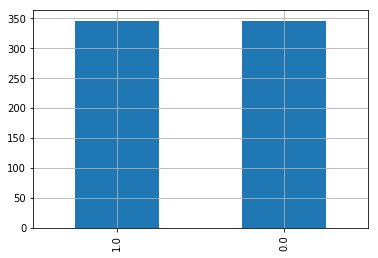

In [17]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

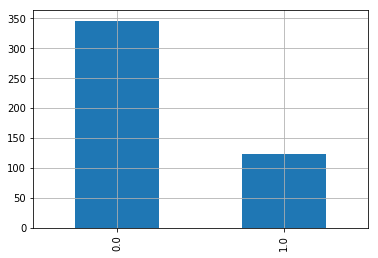

In [18]:
pd.Series(y_train).value_counts().plot.bar()

In [19]:

# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [51]:
print('Accuracy score for Training Dataset = ', metrics.recall_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', metrics.recall_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7394957983193278
Accuracy score for Testing Dataset =  0.3645833333333333


In [25]:
X.default.value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [23]:
from sklearn.utils import resample

In [26]:
df_majority = X[X.default==0]
df_minority = X[X.default==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=517,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [28]:
df_upsampled.head(1)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0


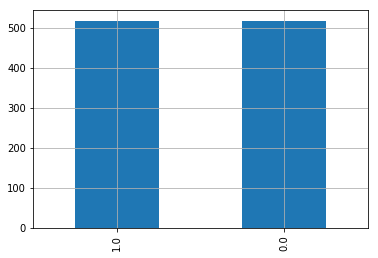

In [29]:
pd.Series(df_upsampled.default).value_counts().plot.bar()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled[['address', 'age', 'creddebt', 'debtinc', 
                                                                   'ed', 'employ', 'income', 'othdebt']],df_upsampled['default'] 
                                                    , test_size = 0.33, random_state = 2, stratify = df_upsampled['default'])

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((692, 8), (342, 8), (692,), (342,))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [35]:
print(' score for Training Dataset = ', metrics.recall_score(train_pred, y_train))
print(' score for Testing Dataset = ', metrics.recall_score(test_pred, y_test))

 score for Training Dataset =  0.7447368421052631
 score for Testing Dataset =  0.7909604519774012


In [37]:
df_majority = X[X.default==0]
df_minority = X[X.default==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=183,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

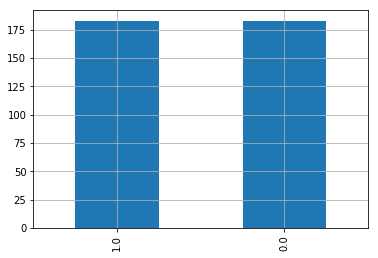

In [38]:
pd.Series(df_downsampled.default).value_counts().plot.bar()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_downsampled[['address', 'age', 'creddebt', 'debtinc', 
                                                                   'ed', 'employ', 'income', 'othdebt']],df_downsampled['default'] 
                                                    , test_size = 0.33, random_state = 2, stratify = df_downsampled['default'])

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((245, 8), (121, 8), (245,), (121,))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [43]:
print(' score for Training Dataset = ', metrics.recall_score(train_pred, y_train))
print(' score for Testing Dataset = ', metrics.recall_score(test_pred, y_test))

 score for Training Dataset =  0.78125
 score for Testing Dataset =  0.7164179104477612


In [44]:
from imblearn.under_sampling import NearMiss

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['address', 'age', 'creddebt', 'debtinc', 
                                                                   'ed', 'employ', 'income', 'othdebt']],X['default'] 
                                                    , test_size = 0.33, random_state = 2, stratify = X['default'])

In [47]:
nm = NearMiss()
X_train_new, y_train_new = nm.fit_sample(X_train, y_train.ravel())

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


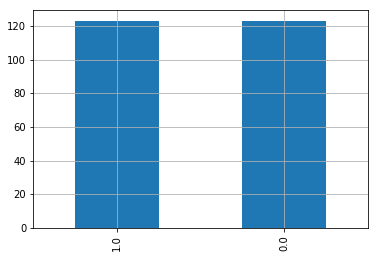

In [48]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [49]:

# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [50]:
print('Accuracy score for Training Dataset = ', metrics.recall_score(train_pred_sm, y_train_new))

Accuracy score for Training Dataset =  0.7394957983193278


In [53]:
print('Accuracy score for Training Dataset = ', metrics.recall_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', metrics.recall_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.7394957983193278
Accuracy score for Testing Dataset =  0.3645833333333333
